In [24]:
import glob
import pandas as pd 
import xml.etree.ElementTree as ET
from datetime import datetime
import requests
import json # Used to load data into Json format
import io
import csv
from pprint import pprint # pretty-print 
import urllib


In [231]:
def JasonData(startDate,endDate):
    base_url = "https://api.nasa.gov/neo/rest/v1/feed?start_date="+startDate+"&end_date="+endDate+"&api_key=oZMj9ugDHdPXcNimvzMjyhFMwvyHDm6K1RwhLyjV"
    req = requests.get(base_url)
    return req.json()

def createDictionary(json_data):
    
#using for loops to go loop throuh the list and add to dictionary

    for i in json_data['near_earth_objects']:
        
        try:
            if i !=0:
                print('Found Asteriods in this Date: ',i)
            
            for j in json_data['near_earth_objects'][i]:
                asteroids_data['asteroid_Id'].append(j['neo_reference_id'])
                asteroids_data['name'].append(j['name'])
                asteroids_data['absolute_magnitude'].append(j['absolute_magnitude_h'])
                asteroids_data['estimated diameter_min_km'].append(j['estimated_diameter']['kilometers']['estimated_diameter_min'])
                asteroids_data['estimated diameter_max_km'].append(j['estimated_diameter']['kilometers']['estimated_diameter_max'])
                asteroids_data['is potentially hazardous asteroid'].append(j['is_potentially_hazardous_asteroid'])
            for k in json_data ['near_earth_objects'][i]:
                asteroids_data['close approach date'].append(k['close_approach_data'][0]['close_approach_date'])
                asteroids_data['close approach: Earth miss distance'].append(k['close_approach_data'][0]['miss_distance']['kilometers'])
                asteroids_data['relative velocity'].append(k['close_approach_data'][0]['relative_velocity']['kilometers_per_second'])
                asteroids_data['orbiting body'].append(k['close_approach_data'][0]['orbiting_body'])                
        except:
            print('There is no asteriod this day')
        
        
asteroids_data = {'asteroid_Id':[],
                 'name':[],
                 'absolute_magnitude':[],
                 'estimated diameter_min_km':[],
                 'estimated diameter_max_km':[],
                 'is potentially hazardous asteroid':[],
                 'close approach date':[],
                 'close approach: Earth miss distance':[],
                 'relative velocity':[],
                 'orbiting body': []}
               


createDictionary(JasonData("2021-10-01","2021-10-08"))
createDictionary(JasonData("2021-10-09","2021-10-16"))
createDictionary(JasonData("2021-10-17","2021-10-24"))
createDictionary(JasonData("2021-10-25","2021-10-31"))

asteroids_data

asteroids_df = pd.DataFrame.from_dict(asteroids_data)
asteroids_df['close approach: Earth miss distance'] = asteroids_df['close approach: Earth miss distance'].astype(float)
asteroids_df['close approach: Earth miss distance'] = asteroids_df['close approach: Earth miss distance']/1000000
asteroids_df


Found Asteriods in this Date:  2021-10-01
Found Asteriods in this Date:  2021-10-06
Found Asteriods in this Date:  2021-10-07
Found Asteriods in this Date:  2021-10-08
Found Asteriods in this Date:  2021-10-02
Found Asteriods in this Date:  2021-10-03
Found Asteriods in this Date:  2021-10-04
Found Asteriods in this Date:  2021-10-05
Found Asteriods in this Date:  2021-10-10
Found Asteriods in this Date:  2021-10-11
Found Asteriods in this Date:  2021-10-12
Found Asteriods in this Date:  2021-10-09
Found Asteriods in this Date:  2021-10-13
Found Asteriods in this Date:  2021-10-14
Found Asteriods in this Date:  2021-10-15
Found Asteriods in this Date:  2021-10-16
Found Asteriods in this Date:  2021-10-20
Found Asteriods in this Date:  2021-10-21
Found Asteriods in this Date:  2021-10-22
Found Asteriods in this Date:  2021-10-23
Found Asteriods in this Date:  2021-10-17
Found Asteriods in this Date:  2021-10-18
Found Asteriods in this Date:  2021-10-19
Found Asteriods in this Date:  202

,asteroid_Id,name,absolute_magnitude,estimated diameter_min_km,estimated diameter_max_km,is potentially hazardous asteroid,close approach date,close approach: Earth miss distance,relative velocity,orbiting body
0,2138893,138893 (2000 YH66),18.080,0.643510,1.438931,False,2021-10-01,64.716716,17.1713267438,Earth
1,2386504,386504 (2009 BP58),18.700,0.483676,1.081534,False,2021-10-01,31.780411,17.1073616275,Earth
2,3607823,(2012 QL14),24.400,0.035039,0.078350,False,2021-10-01,49.369183,22.4017287306,Earth
3,3636861,(2013 JE1),19.200,0.384198,0.859093,False,2021-10-01,26.463244,21.3341866669,Earth
4,3638335,(2013 JV17),27.800,0.007321,0.016370,False,2021-10-01,71.070729,8.6677101656,Earth
...,...,...,...,...,...,...,...,...,...,...
639,54214061,(2021 UF6),25.820,0.018220,0.040742,False,2021-10-27,4.705099,19.4243665267,Earth
640,54214722,(2021 UA7),28.760,0.004705,0.010521,False,2021-10-27,0.128193,27.7716742743,Earth
641,54215209,(2021 VK),24.870,0.028220,0.063102,False,2021-10-27,7.482858,13.5030653938,Earth
642,54218578,(2021 VH8),25.154,0.024760,0.055366,False,2021-10-27,9.481095,9.9527764468,Earth


In [232]:
txt=asteroids_df['name']
txt=txt.str.replace('(','',regex=True).str.replace(')','',regex=True)
# extracting asteroid name and found year
asteroids_df['asteroid_found_year']=[i[0:5]for i in txt]
asteroids_df['asteroid_name']=[i[5:] for i in txt]
asteroids_df = asteroids_df.drop('name',axis=1)
#asteroids_df = asteroids_df.drop([0,1],axis=0)
asteroids_df

,asteroid_Id,absolute_magnitude,estimated diameter_min_km,estimated diameter_max_km,is potentially hazardous asteroid,close approach date,close approach: Earth miss distance,relative velocity,orbiting body,asteroid_found_year,asteroid_name
0,2138893,18.080,0.643510,1.438931,False,2021-10-01,64.716716,17.1713267438,Earth,13889,3 2000 YH66
1,2386504,18.700,0.483676,1.081534,False,2021-10-01,31.780411,17.1073616275,Earth,38650,4 2009 BP58
2,3607823,24.400,0.035039,0.078350,False,2021-10-01,49.369183,22.4017287306,Earth,2012,QL14
3,3636861,19.200,0.384198,0.859093,False,2021-10-01,26.463244,21.3341866669,Earth,2013,JE1
4,3638335,27.800,0.007321,0.016370,False,2021-10-01,71.070729,8.6677101656,Earth,2013,JV17
...,...,...,...,...,...,...,...,...,...,...,...
639,54214061,25.820,0.018220,0.040742,False,2021-10-27,4.705099,19.4243665267,Earth,2021,UF6
640,54214722,28.760,0.004705,0.010521,False,2021-10-27,0.128193,27.7716742743,Earth,2021,UA7
641,54215209,24.870,0.028220,0.063102,False,2021-10-27,7.482858,13.5030653938,Earth,2021,VK
642,54218578,25.154,0.024760,0.055366,False,2021-10-27,9.481095,9.9527764468,Earth,2021,VH8


In [82]:
asteroids_size_df = asteroids_df[['asteroid_Id','estimated diameter_min_km','estimated diameter_max_km','absolute_magnitude']].copy()
asteroids_size_df.to_csv("asteroid_size.csv", index=False)
asteroids_size_df




,asteroid_Id,estimated diameter_min_km,estimated diameter_max_km,absolute_magnitude
0,2138893,0.643510,1.438931,18.080
1,2386504,0.483676,1.081534,18.700
2,3607823,0.035039,0.078350,24.400
3,3636861,0.384198,0.859093,19.200
4,3638335,0.007321,0.016370,27.800
...,...,...,...,...
639,54214061,0.018220,0.040742,25.820
640,54214722,0.004705,0.010521,28.760
641,54215209,0.028220,0.063102,24.870
642,54218578,0.024760,0.055366,25.154


In [86]:
asteroids_speed_df = asteroids_df[['asteroid_Id','relative velocity','close approach: Earth miss distance']].copy()
asteroids_speed_df.to_csv("asteroid_speed.csv", index=False)
asteroids_speed_df

,asteroid_Id,relative velocity,close approach: Earth miss distance
0,2138893,17.1713267438,64.716716
1,2386504,17.1073616275,31.780411
2,3607823,22.4017287306,49.369183
3,3636861,21.3341866669,26.463244
4,3638335,8.6677101656,71.070729
...,...,...,...
639,54214061,19.4243665267,4.705099
640,54214722,27.7716742743,0.128193
641,54215209,13.5030653938,7.482858
642,54218578,9.9527764468,9.481095


In [93]:
asteroids_hazardous_df = asteroids_df[['asteroid_Id','close approach date','is potentially hazardous asteroid']].copy()
asteroids_hazardous_df.to_csv("asteroid_hazardous.csv", index=False)
asteroids_hazardous_df

,asteroid_Id,close approach date,is potentially hazardous asteroid
0,2138893,2021-10-01,False
1,2386504,2021-10-01,False
2,3607823,2021-10-01,False
3,3636861,2021-10-01,False
4,3638335,2021-10-01,False
...,...,...,...
639,54214061,2021-10-27,False
640,54214722,2021-10-27,False
641,54215209,2021-10-27,False
642,54218578,2021-10-27,False


In [230]:
import psycopg2

con = psycopg2.connect(
host = 'localhost',
database = 'asteroid_database',
user = 'postgres',
password = '707lepere',
port='5432')

# cursor
cur = con.cursor()
with open('asteroid_details3.csv', 'r') as f:
    # Notice that we don't need the `csv` module.
    next(f) # Skip the header row.
    cur.copy_from(f, 'asteroid_details', sep=',')

con.commit()




In [ ]:
# cursor
cur = con.cursor()
with open('asteroid_size.csv', 'r') as f:
    # Notice that we don't need the `csv` module.
    next(f) # Skip the header row.
    cur.copy_from(f, 'asteroid_size', sep=',')

con.commit()


In [ ]:
# cursor
cur = con.cursor()
with open('asteroid_speed.csv', 'r') as f:
    # Notice that we don't need the `csv` module.
    next(f) # Skip the header row.
    cur.copy_from(f, 'asteroid_speed', sep=',')

con.commit()


In [ ]:
# cursor
cur = con.cursor()
with open('asteroid_hazardous.csv', 'r') as f:
    # Notice that we don't need the `csv` module.
    next(f) # Skip the header row.
    cur.copy_from(f, 'asteroid_hazardous', sep=',')

con.commit()


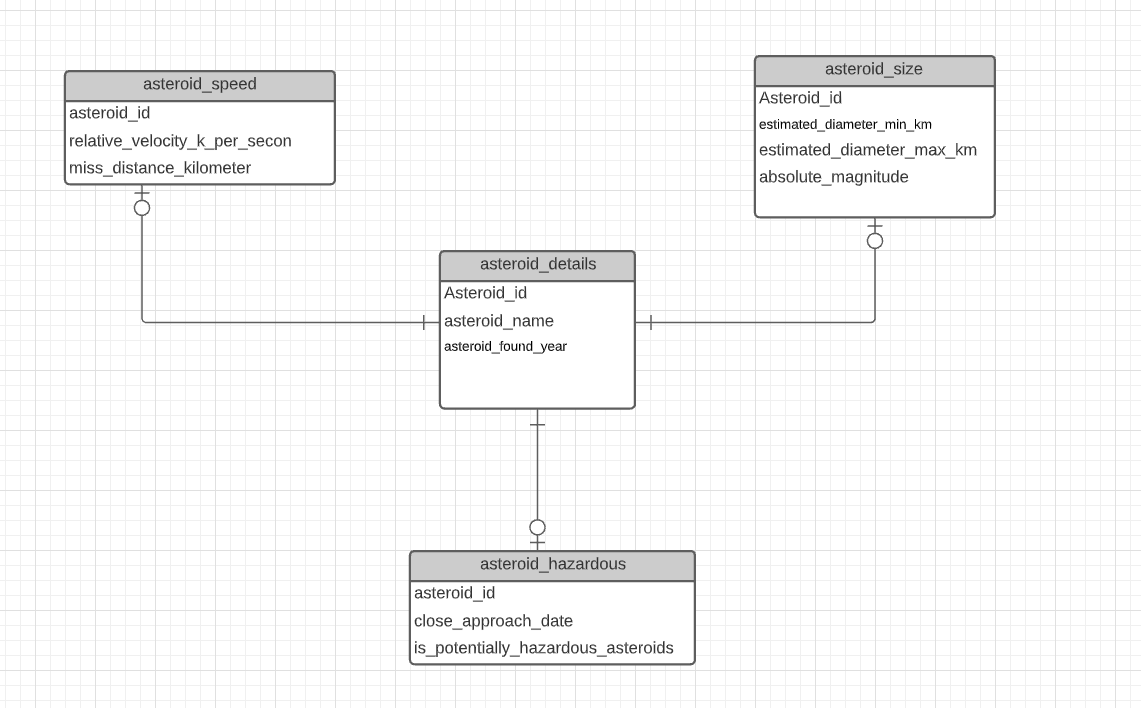